In [80]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [81]:
import sys
sys.path.append('/home/hwkang/jupyter/root/')
from utility.synthesization import *

In [82]:
def visualize_noisy_data(x, y, path, save=False):
    
    # Draw 2 x 5 grid image
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    for i, target_psnr in enumerate([1, 5, 15, 25, 35]):
        image1 = generate_noisy_data_with_psnr(x[4].detach().cpu(), target_psnr)
        image2 = generate_noisy_data_with_psnr(x[7].detach().cpu(), target_psnr)

        axes[0, i].imshow(image1.permute(1,2,0))
        axes[0, i].axis('off')
        axes[0, i].set_title(f'PSNR: {target_psnr}')
        
        axes[1, i].imshow(image2.permute(1,2,0))
        axes[1, i].axis('off')

    # Output the image to path
    plt.tight_layout()
    if save:
        plt.savefig(path)
    plt.show()

In [83]:
def generate_noisy_data_with_psnr(image, target_psnr):
    max_pixel = 1.0  # PyTorch 텐서의 경우 0과 1 사이로 정규화된 이미지라고 가정
    mse_target = (max_pixel ** 2) / (10 ** (target_psnr / 10))
    
    # mse_target을 텐서로 변환
    mse_target_tensor = torch.tensor(mse_target, dtype=image.dtype, device=image.device)
    
    std_dev = torch.sqrt(mse_target_tensor)
    
    noise = torch.normal(0, std_dev, size=image.shape, device=image.device)
    noisy_image = image + noise
    noisy_image = torch.clamp(noisy_image, 0.0, 1.0)  # 픽셀 값을 0과 1 사이로 제한
    
    return noisy_image

In [84]:
def calculate_psnr(original, noisy):
    mse = torch.mean((original - noisy) ** 2)
    if mse == 0:  # MSE가 0이면 PSNR은 무한대
        return float('inf')
    max_pixel = 1.0  # 0과 1 사이로 정규화된 이미지로 가정
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
    return psnr.item()  # 텐서를 스칼라 값으로 반환

In [85]:
class MyNormalize:
    def __init__(self):
        pass
    def __call__(self, data):
        vmax, vmin = data.max(), data.min()
        return (data-vmin)/(vmax-vmin)

In [86]:
dataset_path = '/home/hwkang/jupyter/root/dataset/'

In [87]:
transform = transforms.Compose([transforms.ToTensor(), MyNormalize()])
dataset = datasets.CIFAR10(root=dataset_path, train=True, transform=transform)

In [88]:
loader = DataLoader(dataset, shuffle=False, batch_size=20)

In [89]:
x, y = next(iter(loader))

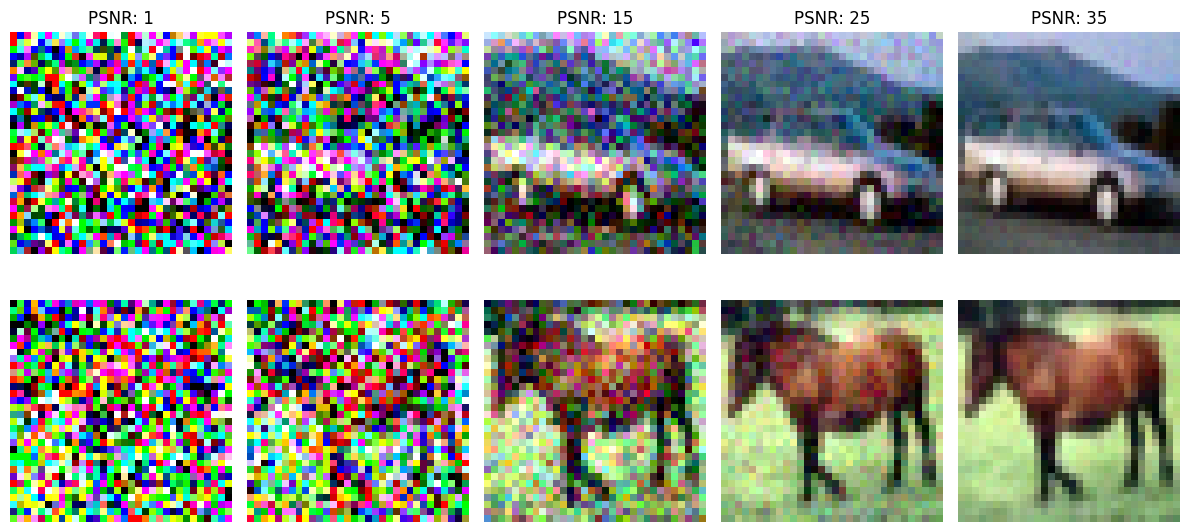

In [91]:
visualize_noisy_data(x, y, 'Noisy_Data_Example.png', True)